## Importing Libraries

In [450]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px

## Loading Dataset

In [322]:
def load_dataset(dataset_name, dataset_path = "Dataset\\"):
    df = pd.read_csv(dataset_path + dataset_name)
    return df
    
customers_df = load_dataset(dataset_name = "Customers.csv")
products_df = load_dataset(dataset_name = "Products.csv")
transactions_df = load_dataset(dataset_name = "Transactions.csv")

## Data Info

In [13]:
print("Customers Dataset\n")
print('No of Rows: ', customers_df.shape[0])
print('No of Columns: ', customers_df.shape[1])

print("\nProducts Dataset\n")
print('No of Rows: ', products_df.shape[0])
print('No of Columns: ', products_df.shape[1])

print("\nTransactions Dataset\n")
print('No of Rows: ', transactions_df.shape[0])
print('No of Columns: ', transactions_df.shape[1])

Customers Dataset

No of Rows:  200
No of Columns:  4

Products Dataset

No of Rows:  100
No of Columns:  4

Transactions Dataset

No of Rows:  1000
No of Columns:  7


## Data Samples

In [18]:
customers_df.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [19]:
products_df.head(3) 

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [20]:
transactions_df.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


## Data Cleaning

In [38]:
def data_cleaning(df):
    #Checking null values
    print("Null Values")
    print(df.isnull().sum(), '\n')
    print("Duplicate Rows")
    print(df[df.duplicated()], '\n')
    
data_cleaning(customers_df)
data_cleaning(products_df)
data_cleaning(transactions_df)

Null Values
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Duplicate Rows
Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: [] 

Null Values
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Duplicate Rows
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: [] 

Null Values
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

Duplicate Rows
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: [] 



### Observations:
- No null values present in Customers, Products & Transactions Dataset
- No duplicate rows present in Customers, Products & Transactions Dataset

## Exploratory Data Analysis

I combined the Products, Customers & Transaction Dataframe to form a Single Dataframe. 
Firstly, I combined Customers & Transactions dataset using Inner join using common Column: CustomerID
Then combined the above dataset with Products dataset using Inner join using common Column: ProductID

In [323]:
combined_dataset = pd.merge(left = customers_df, right = transactions_df, how = "inner", on = "CustomerID")
dataset = pd.merge(left = combined_dataset, right = products_df, how = "inner", on = "ProductID")

#Drop Duplicate Column
dataset.drop(columns = 'Price_y', axis = 1, inplace = True)

#Rename Price_x to Price
dataset.rename(columns = {'Price_x':'Price'}, inplace=True)
dataset.head(3)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,57.3,SoundWave Cookbook,Books
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,57.3,SoundWave Cookbook,Books
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,57.3,SoundWave Cookbook,Books


<h2 align="center"> Customer Segmentation </h2> 

### Customer Distribution by Region

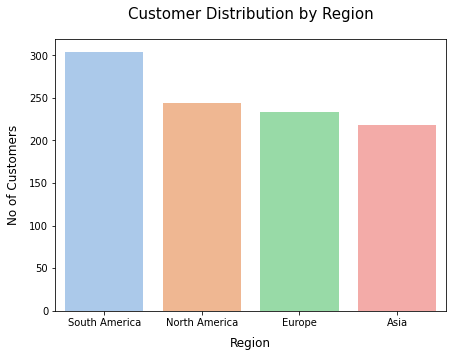

In [463]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = dataset, x = 'Region', order = dataset['Region'].value_counts().index, palette = 'pastel')
plt.title('Customer Distribution by Region', size = 15, color = 'black', loc = 'center', pad = 20)
plt.xlabel('Region', size = 12, labelpad = 9, color = 'black')
plt.ylabel('No of Customers', size = 12, labelpad = 9, color = 'black')

### Customer Net Value

I calculated Total Spent of customer (summing the transactions value for each customer).   
Based on TotalValue I categorize the customers in three categories i.e.

- High Value Customer (Total Spent greater 5000)
- Medium Value Customer (Total Spent greater than 2000 but less than or equal to 5000) and 
- Low Value Customer (Total Spent less than 2000)

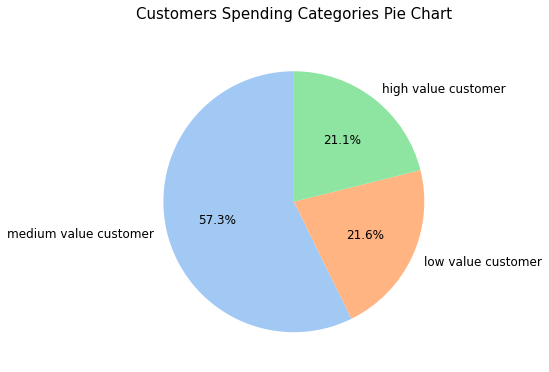

In [464]:
total_val = dataset.groupby('CustomerID')['TotalValue'].sum()

def customer_value(total_value):
    if total_value <= 2000:
        return "low value customer"
    elif total_value > 2000 and total_value <= 5000:
        return "medium value customer"
    elif total_value > 5000:
        return "high value customer"
    
category_count = total_val.apply(customer_value).value_counts()


plt.figure(figsize = (6, 6))
plt.pie(category_count, labels = category_count.index, startangle = 90, autopct = '%.1f%%', radius = 1, textprops = {'fontsize': 12}, colors = sns.color_palette("pastel", len(category_count)))
plt.title('Customers Spending Categories Pie Chart', fontsize = 15, loc = 'center', color = 'black', pad = 20)

<h2 align="center"> Product Performance </h2> 

### Most Selling Products

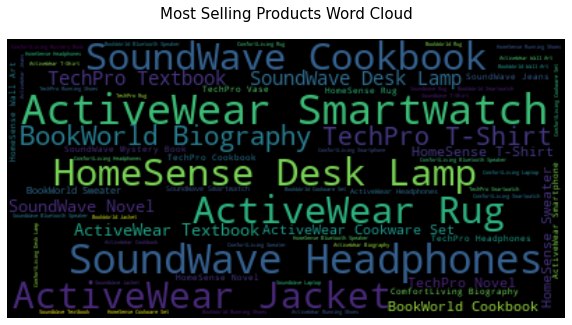

In [467]:
def plot_wordcloud(ColumnName, title):
    plt.figure(figsize = (10, 6))
    wordcloud = WordCloud().generate_from_frequencies(dataset.groupby([ColumnName])['Quantity'].sum().to_dict())
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(title, fontsize = 15, pad = 20, color = 'black')
    plt.axis('off')
    plt.show()
    
plot_wordcloud(ColumnName = 'ProductName', title = 'Most Selling Products Word Cloud')



### Most Selling Categories

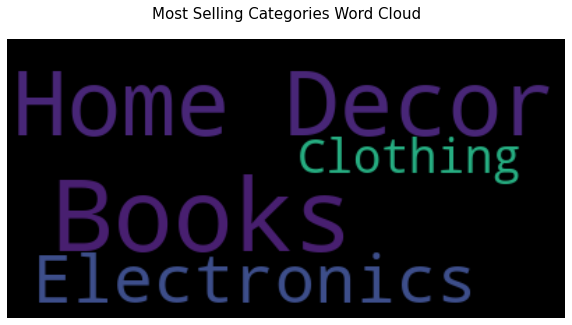

In [468]:
plot_wordcloud(ColumnName = 'Category', title = 'Most Selling Categories Word Cloud')

### Most Selling Product by Region

In [470]:
df = dataset.groupby(['Region','ProductName',])['Quantity'].sum().reset_index()
max_df = df.loc[df.groupby('Region')['Quantity'].idxmax()]

fig = px.bar(max_df, x = 'Region', y = 'Quantity', color = 'ProductName', text = 'ProductName', title = 'Most Selling Product by Region')
fig.show()        

<Figure size 432x288 with 0 Axes>

### Product Seasonal Trends

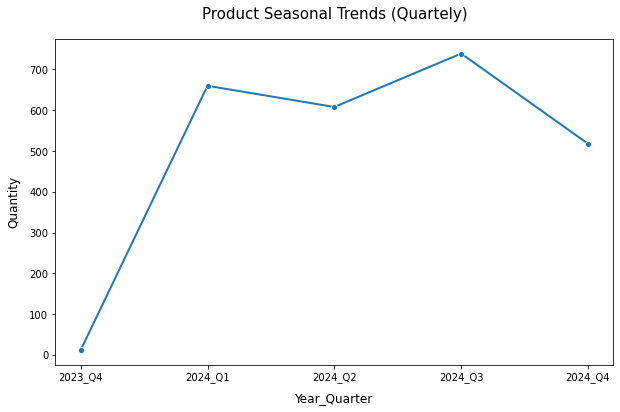

In [471]:
df = dataset.copy()

transaction_date = pd.to_datetime(df['TransactionDate'])
df['Quarter'] = transaction_date.dt.quarter
df['Year'] = transaction_date.dt.year
df['QuarterYear'] = df['Year'].astype(str) + '_Q' + df['Quarter'].astype(str)

df = df.groupby(['QuarterYear'])['Quantity'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data = df, x = 'QuarterYear', y = 'Quantity', marker = 'o', linewidth = 2)

plt.title('Product Seasonal Trends (Quartely)', size = 15, color = 'black', loc = 'center', pad = 20)
plt.xlabel('Year_Quarter', size = 12, labelpad = 9, color = 'black')
plt.ylabel('Quantity', size = 12, labelpad = 9, color = 'black')


### Customer Retention

Text(0.5, 1.0, 'Customers Retention Pie Chart')

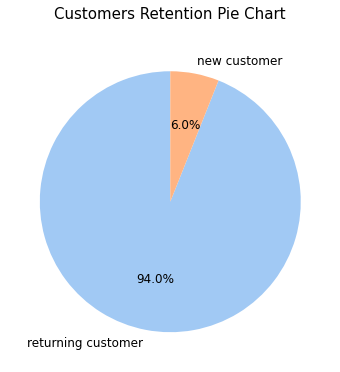

In [473]:
retention_count = dataset['CustomerID'].value_counts().apply(lambda id: 'returning customer' if id > 1 else 'new customer').value_counts()


plt.figure(figsize = (6, 6))
plt.pie(retention_count, labels = retention_count.index, startangle = 90, autopct = '%.1f%%', radius = 1, textprops = {'fontsize': 12}, colors = sns.color_palette("pastel", len(retention_count)))
plt.title('Customers Retention Pie Chart', fontsize = 15, loc = 'center', color = 'black', pad = 20)